In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import cartopy as cy
import cartopy.crs as ccrs

In [2]:
path = '/home/jovyan/Tjaernoe2022-group5/data/AR_detection_2020.nc4'
ar = xr.open_dataset(path)

In [3]:
ar

<xarray.Dataset>
Dimensions:        (time: 2928, lat: 361, lon: 576)
Coordinates:
  * lat            (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon            (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * time           (time) datetime64[ns] 2020-01-01 ... 2020-12-31T21:00:00
Data variables:
    ar_binary_tag  (time, lat, lon) int8 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.0rc2 (https://mpimet.mpg...
    Conventions:  CF-1.6
    description:  ARTMIP file format (Ullrich)
    history:      Tue May  3 12:22:37 2022: ncks -4 -L 1 temp_MERRA2.ar_tag.W...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.0rc4 (https://mpimet.mpg...

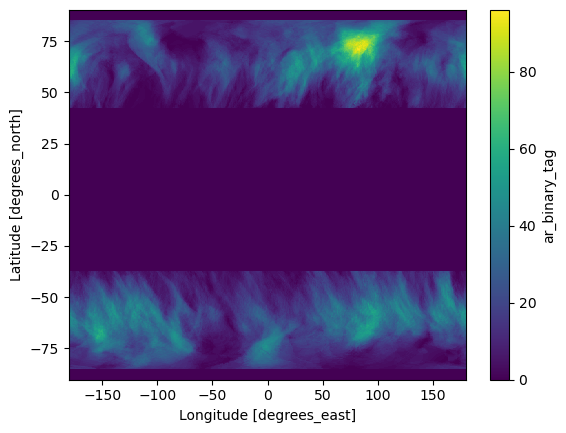

In [7]:
#sum of occurence of atmospheric rivers over the whole year
ar['ar_binary_tag'].sum('time').plot()

In [44]:
sm = ar['ar_binary_tag'].sum('time')
smarc = sm.sel(lat=slice(50,90))
smant = sm.sel(lat=(sm.lat < -50) | (sm.lat > -90))

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


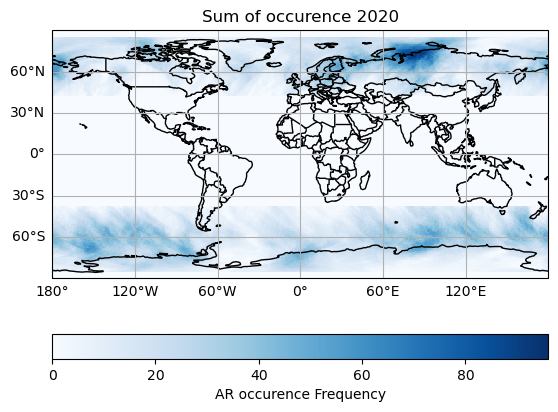

In [28]:
f,ax = plt.subplots(dpi=100,subplot_kw={'projection':ccrs.PlateCarree()})


sm.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    cbar_kwargs={
        'label':'AR occurence Frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    #levels = 6
)
ax.set_title('Sum of occurence 2020')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

ax.add_feature(cy.feature.BORDERS);

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


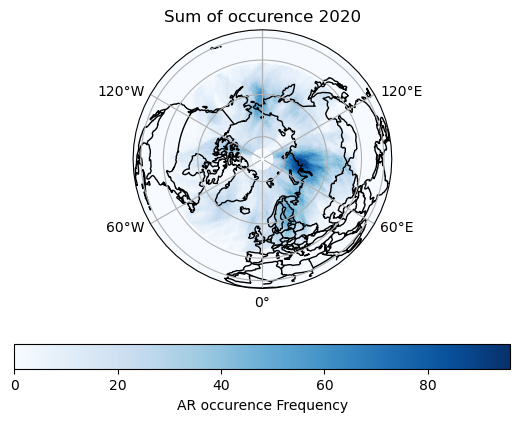

In [49]:

f,ax = plt.subplots(dpi=100,
                    subplot_kw={'projection':ccrs.Orthographic(central_latitude=90.0)})
sm.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    cbar_kwargs={
        'label':'AR occurence Frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    #levels = 6
)
ax.set_title('Sum of occurence 2020')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

ax.add_feature(cy.feature.BORDERS);

<xarray.DataArray 'lat' (lat: 361)>
array([-90. , -89.5, -89. , ...,  89. ,  89.5,  90. ])
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


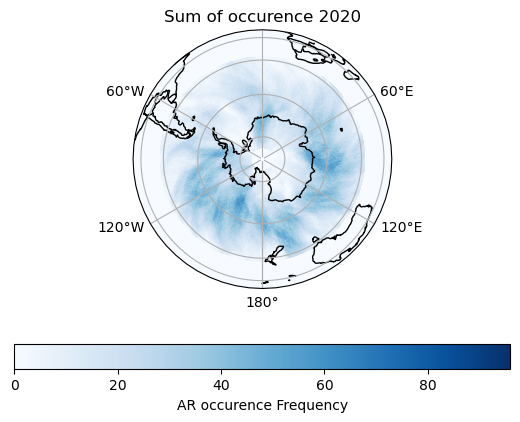

In [48]:
f,ax = plt.subplots(dpi=100,
                    subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90.0)})

sm.plot.pcolormesh(
    cmap = plt.get_cmap('Blues'),ax=ax,
    cbar_kwargs={
        'label':'AR occurence Frequency', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    #levels = 6
)
ax.set_title('Sum of occurence 2020')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

ax.add_feature(cy.feature.BORDERS);